# Central Limit Theorem

## Example 1: 
- Number of days 6 employees were absent in a year: 1,3,6,7,9,10

### a) Select all possible samples of n=2 and construct a sampling distribution of the mean

In [14]:
#using gtools for permutation
library(gtools)

In [15]:
x <- c(1,3,6,7,9,10)

In [16]:
#Mean of population
mean(x)

[1] 6

#### Find all combinations is sample size n=2

In [18]:
#Using combinations() instead of permutations()
#combinations() does not include replacement
comb <- combinations(n=length(x), r=2, v=x)
comb

1,3
1,6
1,7
1,9
1,10
3,6
3,7
3,9
3,10
6,7
6,9


In [19]:
class(comb)

[1] "matrix"

#### Find Mean across each combination (row wise)

In [20]:
comb.means <- rowMeans(comb)
comb.means

[1] 2.0 3.5 4.0 5.0 5.5 4.5 5.0 6.0 6.5 6.5 7.5 8.0 8.0 8.5 9.5

#### Find Mean of Means

In [21]:
mean(comb.means)

[1] 6

- Same Mean as the Mean of the whole population
- The sample mean is unbiased because the mean of all the possible sample means (of a given sample size, n) is equal to the population mean

#### Create a function that returns Sample Distribution 

In [26]:
combinationMean <- function(x, size){
    len <- length(x)
    comb <- combinations(n=len, r=size, v=x)
    rowMeans(comb)
}

In [28]:
sample_distribution <- combinationMean(x, 2)
sample_distribution

[1] 2.0 3.5 4.0 5.0 5.5 4.5 5.0 6.0 6.5 6.5 7.5 8.0 8.0 8.5 9.5

In [29]:
mean(sample_distribution)

[1] 6

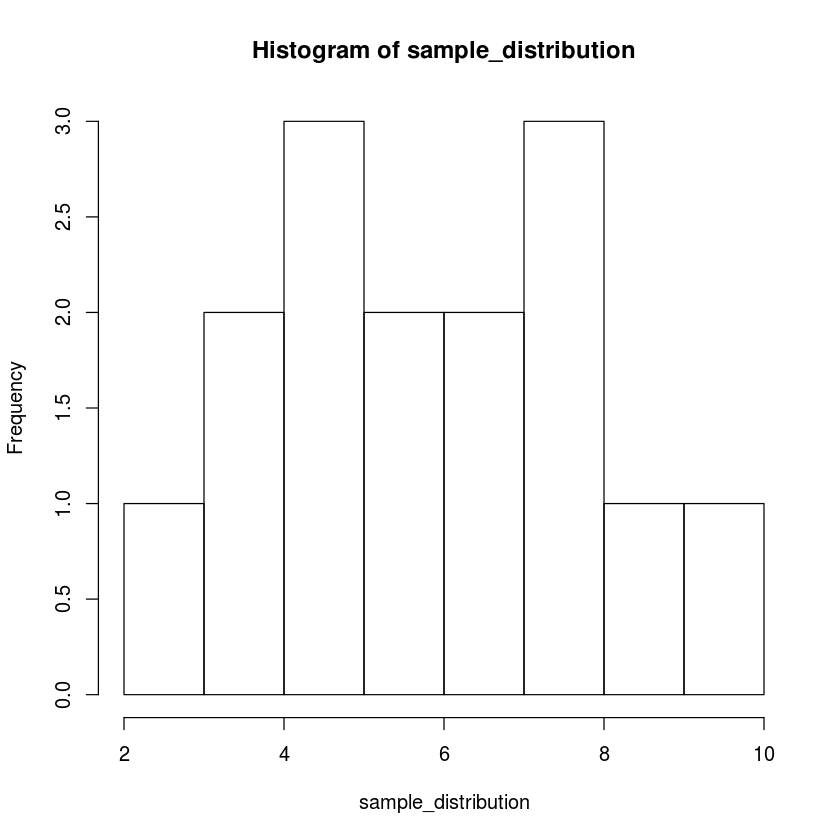

In [33]:
hist(sample_distribution, breaks=10)

### b) Select all possible samples of n=3 and construct a sampling distribution of the mean

In [34]:
sample_distribution <- combinationMean(x, 3)
sample_distribution

[1] 3.333333 3.666667 4.333333 4.666667 4.666667 5.333333 5.666667 5.666667
 [9] 6.000000 6.666667 5.333333 6.000000 6.333333 6.333333 6.666667 7.333333
[17] 7.333333 7.666667 8.333333 8.666667

In [35]:
mean(sample_distribution)

[1] 6

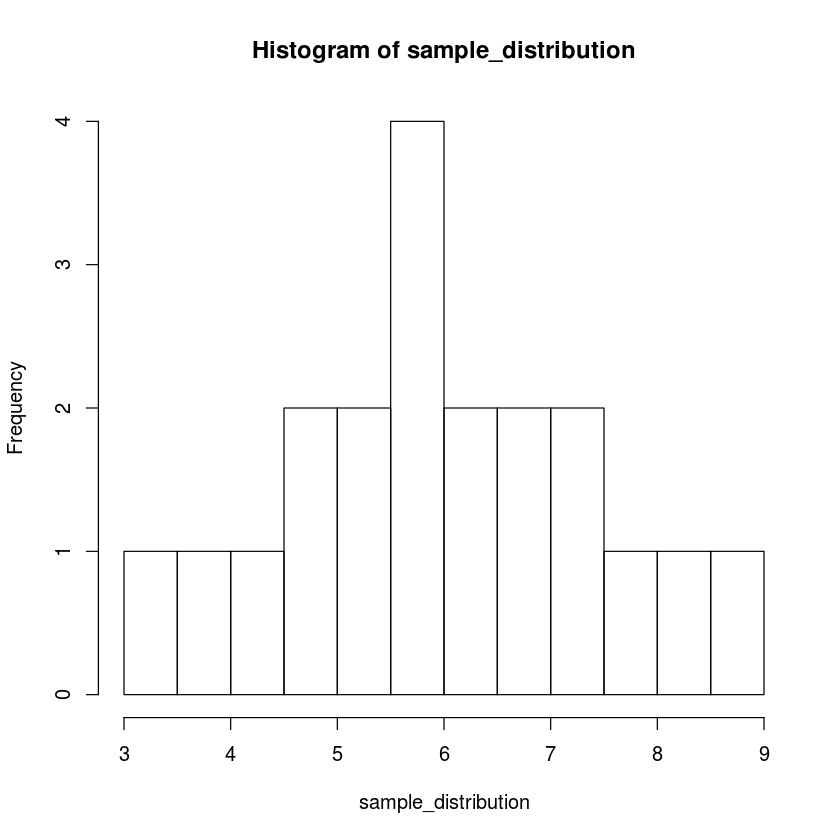

In [36]:
hist(sample_distribution, breaks=10)

- Sampling Distribution of Sample Size 3 has less variability than Sample Size 2

<hr>

## Example 2: 
- Median home price 245,200.   Mean home price 291,200.  SD 90,000

### a) Describe Sampling Distribution xbar with Sample Size n=4

In [43]:
pop.mean <- 291200
pop.sd <- 90000

sample.size <- 4
sample.mean <- pop.mean
sample.sd <- pop.sd/sqrt(sample.size)

In [44]:
sample.mean
sample.sd

[1] 291200

[1] 45000

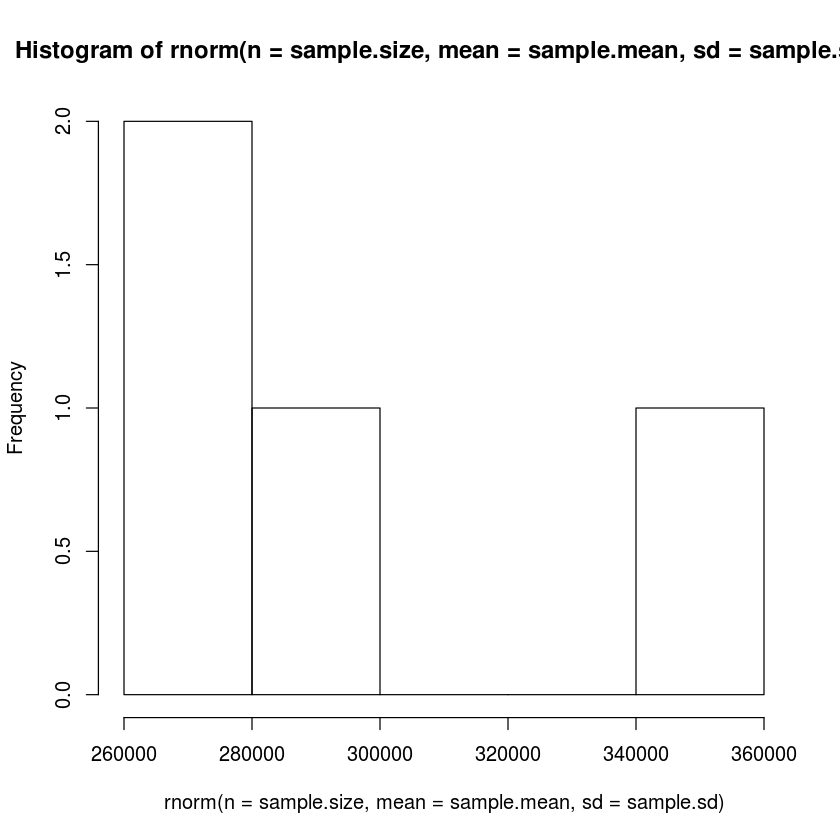

In [45]:
hist(rnorm(n=sample.size, mean=sample.mean, sd=sample.sd))

### a) Describe Sampling Distribution xbar with Sample Size n=100

In [46]:
pop.mean <- 291200
pop.sd <- 90000

sample.size <- 100
sample.mean <- pop.mean
sample.sd <- pop.sd/sqrt(sample.size)

In [47]:
sample.mean
sample.sd

[1] 291200

[1] 9000

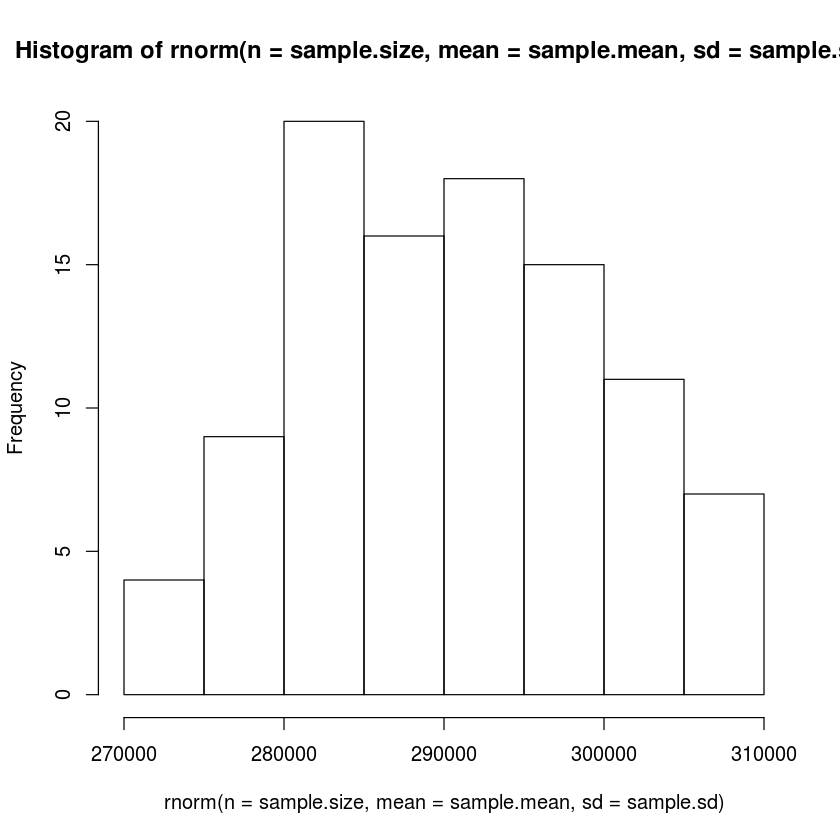

In [48]:
hist(rnorm(n=sample.size, mean=sample.mean, sd=sample.sd))

### c) With Sample Size n=100, what is the probability that sample mean will be less than 315,000

In [52]:
value <- 315000
z.value <- (value - sample.mean)/sample.sd #2.64444444444444
pnorm(z.value)

[1] 0.9959087

- 99.5% probability

### d) With Sample Size n=100, what is the probability that sample mean will be between 295,00 and 310,000

In [55]:
value1 <- 295000
value2 <- 310000

z.value1 <- (value1 - sample.mean)/sample.sd #0.4222222
pnorm(z.value1)

z.value2 <- (value2 - sample.mean)/sample.sd #2.088889
pnorm(z.value2)

answer <- pnorm(z.value2) - pnorm(z.value1)
answer

[1] 0.6635686

[1] 0.9816411

[1] 0.3180725

- 31.8% probability

<hr>

## Example 3: 
- Students spend 27 houts a week on strudy with SD of 4

### a) What is the probability that mean time spent on study is at least 26 hours a week with Sample Size of 16

In [9]:
pop.mean <- 27
pop.sd <- 4

sample.size <- 16
sample.mean <- 27
sample.sd <- pop.sd/sqrt(sample.size) #1

In [10]:
value <- 26
z.value <- (value - sample.mean)/sample.sd
z.value

[1] -1

#### To find probability of at least 26, use pnorm() with lower.tail=FALSE

In [11]:
pnorm(z.value, lower.tail=FALSE)

[1] 0.8413447

- 84.1% probability that the mean time spent on study is at least 26 hours a week

### b) There is  85% chance that the sample mean is less than how many hours a week? 

In [12]:
p.value <- 0.85
z.value <- qnorm(p.value)
z.value

[1] 1.036433

In [13]:
#derived from z-score equation: z = value - mean / sd
answer <- z.value * sample.sd + sample.mean
answer

[1] 28.03643

- 85% chance that the Mean hours a week spend on study is less than 28 hours

<hr>

## Example 4: 
- Election with 2 candidates.  Candidate is forecasted a winner when they recieve 55% of votes in a sample pole

### a) With Sample Size of 100, what is the probability of a candidate being a winner if they recieve population vote of 50.1%

In [24]:
pop.prop <- 0.501

sample.size <- 100
sample.prop <- pop.prop
sample.sd <- sqrt(pop.prop*(1 -pop.prop)/sample.size) #0.049

In [25]:
value <- 0.55
z.value <- (value - sample.prop)/sample.sd #0.98

#### To get at least 55% votes, use pnorm() with lower.tail=FALSE

In [26]:
pnorm(z.value, lower.tail=FALSE)

[1] 0.1635426

- 16.4% chance that a candidate will be a winner if they receive 50.1% of population votes

### b) With Sample Size of 100, what is the probability of a candidate being a winner if they recieve population vote of 60%

In [27]:
pop.prop <- 0.60

sample.size <- 100
sample.prop <- pop.prop
sample.sd <- sqrt(pop.prop*(1 -pop.prop)/sample.size) 

value <- 0.55
z.value <- (value - sample.prop)/sample.sd

pnorm(z.value, lower.tail=FALSE)

[1] 0.8462829

- 84.6% chance that a candidate will be a winner if they receive 50.1% of population votes

### c) Answers to parts (a) and (b) with Sample Size of 400

In [28]:
pop.prop <- 0.501

sample.size <- 400
sample.prop <- pop.prop
sample.sd <- sqrt(pop.prop*(1 -pop.prop)/sample.size) 

value <- 0.55
z.value <- (value - sample.prop)/sample.sd

pnorm(z.value, lower.tail=FALSE)

[1] 0.02499767

-  Probability goes down to 2.5% with 50.1% of population votes

In [29]:
pop.prop <- 0.60

sample.size <- 400
sample.prop <- pop.prop
sample.sd <- sqrt(pop.prop*(1 -pop.prop)/sample.size) 

value <- 0.55
z.value <- (value - sample.prop)/sample.sd

pnorm(z.value, lower.tail=FALSE)

[1] 0.9793866

-  Probability goes up to 97.94% with 60% of population votes

<hr>

### Example 5:
- 